# Extract the data from csv

In [24]:
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

raw_csv_data = np.loadtxt('Coffee.csv', delimiter=';')

unscaled_inputs_all = raw_csv_data[:,0:15]
targets_all = raw_csv_data[:,-1]

# Standardize the inputs

In [25]:
scaled_inputs = preprocessing.scale(unscaled_inputs_all)

# Shuffle the data

In [26]:
shuffled_indices=np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_all[shuffled_indices]

# Split into Training, Validation and Test

In [27]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets)/train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets)/validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets)/test_samples_count)

1137.0 508 2.2381889763779528
168.0 63 2.6666666666666665
133.0 64 2.078125


# Save the 3 datasets in *.npz

In [28]:
np.savez('Coffee_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Coffee_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Coffee_data_test', inputs=test_inputs, targets=test_targets)

# Load Data

In [29]:
npz = np.load('Coffee_data_train.npz')

train_inputs, train_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('Coffee_data_validation.npz')

validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('Coffee_data_test.npz')

test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

# Model

In [50]:
input_size = 15
output_size = 5
hidden_layer_size = 6

model = tf.keras.Sequential([
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                                tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                                tf.keras.layers.Dense(output_size, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

num_epochs = 100
batch_size = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_inputs, 
          train_targets, 
          batch_size = batch_size, 
          epochs = num_epochs, 
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets), 
          verbose=2)

Train on 508 samples, validate on 63 samples
Epoch 1/100
508/508 - 0s - loss: 1.6126 - accuracy: 0.3287 - val_loss: 1.6116 - val_accuracy: 0.3333
Epoch 2/100
508/508 - 0s - loss: 1.5645 - accuracy: 0.3366 - val_loss: 1.5582 - val_accuracy: 0.3333
Epoch 3/100
508/508 - 0s - loss: 1.5236 - accuracy: 0.3543 - val_loss: 1.5089 - val_accuracy: 0.3492
Epoch 4/100
508/508 - 0s - loss: 1.4865 - accuracy: 0.3701 - val_loss: 1.4634 - val_accuracy: 0.4286
Epoch 5/100
508/508 - 0s - loss: 1.4523 - accuracy: 0.3878 - val_loss: 1.4234 - val_accuracy: 0.4444
Epoch 6/100
508/508 - 0s - loss: 1.4201 - accuracy: 0.4193 - val_loss: 1.3872 - val_accuracy: 0.4762
Epoch 7/100
508/508 - 0s - loss: 1.3900 - accuracy: 0.4587 - val_loss: 1.3526 - val_accuracy: 0.5238
Epoch 8/100
508/508 - 0s - loss: 1.3602 - accuracy: 0.4921 - val_loss: 1.3192 - val_accuracy: 0.5714
Epoch 9/100
508/508 - 0s - loss: 1.3319 - accuracy: 0.5276 - val_loss: 1.2867 - val_accuracy: 0.6349
Epoch 10/100
508/508 - 0s - loss: 1.3062 - acc

Epoch 81/100
508/508 - 0s - loss: 0.3407 - accuracy: 0.8858 - val_loss: 0.3378 - val_accuracy: 0.8889
Epoch 82/100
508/508 - 0s - loss: 0.3376 - accuracy: 0.8839 - val_loss: 0.3365 - val_accuracy: 0.9048
Epoch 83/100
508/508 - 0s - loss: 0.3350 - accuracy: 0.8839 - val_loss: 0.3351 - val_accuracy: 0.9048
Epoch 84/100
508/508 - 0s - loss: 0.3318 - accuracy: 0.8839 - val_loss: 0.3338 - val_accuracy: 0.9048
Epoch 85/100
508/508 - 0s - loss: 0.3300 - accuracy: 0.8839 - val_loss: 0.3329 - val_accuracy: 0.9048
Epoch 86/100
508/508 - 0s - loss: 0.3271 - accuracy: 0.8858 - val_loss: 0.3318 - val_accuracy: 0.9048
Epoch 87/100
508/508 - 0s - loss: 0.3249 - accuracy: 0.8898 - val_loss: 0.3295 - val_accuracy: 0.9048
Epoch 88/100
508/508 - 0s - loss: 0.3226 - accuracy: 0.8878 - val_loss: 0.3280 - val_accuracy: 0.9048
Epoch 89/100
508/508 - 0s - loss: 0.3203 - accuracy: 0.8898 - val_loss: 0.3269 - val_accuracy: 0.8889
Epoch 90/100
508/508 - 0s - loss: 0.3177 - accuracy: 0.8898 - val_loss: 0.3264 - v

# Test Model

In [51]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)


64/64 [==============================] - 0s 109us/sample - loss: 0.3830 - accuracy: 0.8125


In [52]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.38. Test accuracy: 81.25%


# Confusion Matrix

In [49]:
rounded_predictions = model.predict_classes(test_inputs, batch_size = batch_size, verbose=0)

cm = confusion_matrix(test_targets,rounded_predictions)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(lens(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print ('Normalized Confusion Matrix')
    else:
        print ('Confusion Matrix without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white'if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


NameError: name 'lens' is not defined

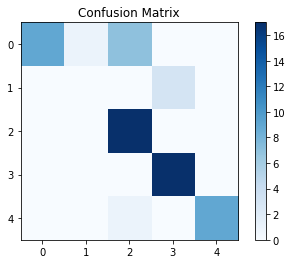

In [21]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')